In [4]:
import pandas as pd

# Für diese Aufgabe Features müssen ordentlich vorbereitet werden: 
# census[col] = pd.factorize(census[col])[0] wird nicht mehr ausreichen. Denken Sie daran, dass manche Features ordinal sind.
df = pd.read_csv("../../../data/census.csv")

In [5]:
# Numerische Werte:

# SEX: Male: 1, Female: 0
df["sex"] = df["sex"].replace({' Male': 1, ' Female': 0})

# RACE: Asian-Pac-Islander: 4, White: 3, Black: 2, Amer-Indian-Eskimo: 1, Other: 0
df["race"] = df["race"].replace({' White': 3, ' Black': 2, ' Asian-Pac-Islander': 4, ' Amer-Indian-Eskimo':1, ' Other': 0})

# Relationship: Other-relative:5, Husband:4, Not-in-family: 3,  Own-child:2, Unmarried:1, Wife:0     
#df["relationship"] = df["relationship"].replace({"Other-relative":5, "Husband": 4, "Not-in-family": 3, "Own-child":2, "Unmarried":1, "Wife":0})

# TARGET: >50K: 1, <=50K: 0 
df["target"] = df["target"].replace({' >50K': 1, ' <=50K': 0})



In [6]:
from sklearn.preprocessing import OneHotEncoder
encoder_1hot = OneHotEncoder(sparse=False)
df_cat_1hot = encoder_1hot.fit_transform(df[["relationship"]])
df_cat_1hot = pd.DataFrame(df_cat_1hot)
df_cat_1hot.columns = encoder_1hot.get_feature_names(['encoded'])
encoder_2hot = OneHotEncoder(sparse=False)
df_cat_2hot = encoder_2hot.fit_transform(df[["education"]])
df_cat_2hot = pd.DataFrame(df_cat_2hot)
df_cat_2hot.columns = encoder_2hot.get_feature_names(['encoded'])
encoder_3hot = OneHotEncoder(sparse=False)
df_cat_3hot = encoder_3hot.fit_transform(df[["workclass"]])
df_cat_3hot = pd.DataFrame(df_cat_3hot)
df_cat_3hot.columns = encoder_3hot.get_feature_names(['encoded'])



/Users/alexandra.arkhipova/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/alexandra.arkhipova/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/alexandra.arkhipova/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning

In [7]:
conect = pd.concat([df, df_cat_1hot], axis=1)
conect1 = pd.concat([conect, df_cat_2hot], axis=1)
conect2 = pd.concat([conect1, df_cat_3hot], axis=1)



In [8]:
conect2.describe()

,age,race,sex,capital-gain,capital-loss,hours-per-week,target,encoded_ Husband,encoded_ Not-in-family,encoded_ Other-relative,...,encoded_ Some-college,encoded_ ?,encoded_ Federal-gov,encoded_ Local-gov,encoded_ Never-worked,encoded_ Private,encoded_ Self-emp-inc,encoded_ Self-emp-not-inc,encoded_ State-gov,encoded_ Without-pay
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.891895,0.669205,1077.648844,87.303830,40.437456,0.240810,0.405178,0.255060,0.030128,...,0.223918,0.056386,0.029483,0.064279,0.000215,0.697030,0.034274,0.078038,0.039864,0.000430
std,13.640433,0.478836,0.470506,7385.292085,402.960219,12.347429,0.427581,0.490934,0.435901,0.170942,...,0.416874,0.230670,0.169159,0.245254,0.014661,0.459549,0.181935,0.268236,0.195642,0.020731
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,3.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
corr_matrix = conect2.corr()
corr_matrix["target"].sort_values(ascending=False)


target                       1.000000
encoded_ Husband             0.401035
age                          0.234037
hours-per-week               0.229689
capital-gain                 0.223329
sex                          0.215980
encoded_ Bachelors           0.180485
encoded_ Masters             0.174570
encoded_ Prof-school         0.154907
capital-loss                 0.150526
encoded_ Self-emp-inc        0.139467
encoded_ Doctorate           0.132572
encoded_ Wife                0.123264
race                         0.088451
encoded_ Federal-gov         0.059372
encoded_ Local-gov           0.033091
encoded_ Self-emp-not-inc    0.030019
encoded_ State-gov           0.014843
encoded_ Assoc-voc           0.010048
encoded_ Assoc-acdm          0.003250
encoded_ Never-worked       -0.008259
encoded_ Without-pay        -0.011681
encoded_ Preschool          -0.022307
encoded_ 1st-4th            -0.034544
encoded_ 12th               -0.044690
encoded_ 5th-6th            -0.045826
encoded_ 9th

In [10]:
conect2.pop('workclass')
conect2.pop('education')
conect2.pop('marital-status')
conect2.pop('occupation')
conect2.pop('relationship') 
conect2.pop('native-country') 



0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native-country, Length: 32561, dtype: object

In [11]:
features=["target","encoded_ Husband","age","hours-per-week","capital-gain","sex","encoded_ Bachelors","encoded_ Masters",
        "encoded_ Prof-school","capital-loss","encoded_ Self-emp-inc","encoded_ Doctorate","encoded_ HS-grad",
          "encoded_ Unmarried", "encoded_ Not-in-family","encoded_ Own-child"]
scatter_matrix(conect2[features],figsize=(10,7))
plt.show()


NameError: name 'scatter_matrix' is not defined

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix  



In [ ]:
pd.plotting.scatter_matrix(conect2, figsize=(34,20))
#plt.figure(figsize=(34,20))
plt.show()

In [ ]:
pd.plotting.scatter_matrix(data) 

In [22]:
import scipy.stats as stats
import scipy.integrate 
import scipy.integrate as integrate
import scipy
import seaborn as sns




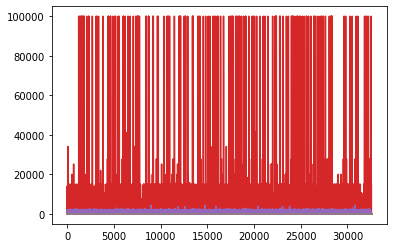

In [40]:
fig = plt.figure()
ax = plt.axes()
plt.plot(conect2)
plt.show()